# Bitcoin Time Series Analysis
Created by Muzzammil Fadli

In [1]:
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

I use bitcoin data from https://coinmetrics.io/

In [2]:
# read dataset
df = pd.read_csv("btc.csv")

In [3]:
df.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),realizedCap(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2009-01-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['date', 'txVolume(USD)', 'adjustedTxVolume(USD)', 'txCount',
       'marketcap(USD)', 'price(USD)', 'exchangeVolume(USD)',
       'realizedCap(USD)', 'generatedCoins', 'fees', 'activeAddresses',
       'averageDifficulty', 'paymentCount', 'medianTxValue(USD)', 'medianFee',
       'blockSize', 'blockCount'],
      dtype='object')

use only bitcoin price to make prediction in the next day

In [5]:
btc = df[['date', 'marketcap(USD)', 'price(USD)']]

In [6]:
btc.head()

,date,marketcap(USD),price(USD)
0,2009-01-03,NaN,NaN
1,2009-01-04,NaN,NaN
2,2009-01-05,NaN,NaN
3,2009-01-06,NaN,NaN
4,2009-01-07,NaN,NaN


### Check Missing Values

In [7]:
total = btc.isnull().sum().sort_values(ascending = False)
percent = (btc.isnull().sum()/btc.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,price(USD),marketcap(USD),date
Total,1576.000000,1576.000000,0.0
Percent,43.237311,43.237311,0.0


drop all missing values

In [8]:
btc = btc.dropna()

In [9]:
btc.head()

,date,marketcap(USD),price(USD)
1576,2013-04-28,1.500656e+09,135.30
1577,2013-04-29,1.491703e+09,134.44
1578,2013-04-30,1.598310e+09,144.00
1579,2013-05-01,1.543334e+09,139.00
1580,2013-05-02,1.292577e+09,116.38


### Plotting Time Series

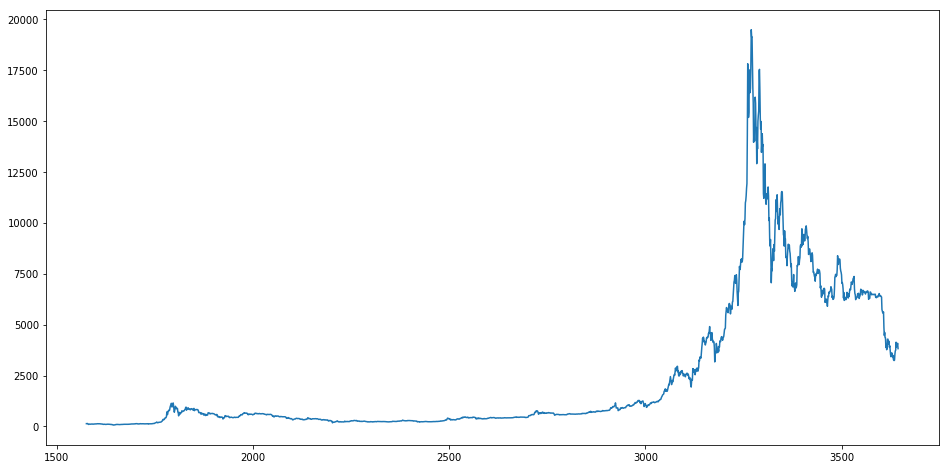

In [10]:
plt.figure(figsize=(16,8))
plt.plot(btc['price(USD)'])

In [12]:
btc.corr()

,marketcap(USD),price(USD)
marketcap(USD),1.000000,0.999769
price(USD),0.999769,1.000000


### Build Time Series Model

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings; warnings.simplefilter('ignore')

from __future__ import absolute_import, division, print_function

import sys
import os

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### Creating data for training and testing

In [12]:
btc.count()

date              2069
marketcap(USD)    2069
price(USD)        2069
dtype: int64

In [13]:
n_train = int(0.95*2069)+1
n_forecast = 2069 - n_train

btc_train = btc.iloc[:n_train]['price(USD)']
btc_test = btc.iloc[n_train:]['price(USD)']

In [14]:
print(btc_train.shape)
print(btc_test.shape)

(1966,)
(103,)


In [15]:
print("Training Series:", "\n", btc_train.tail(),"\n")
print("Testing Series:", "\n", btc_test.head())

Training Series: 
 3537   6301.57000
3538   6331.88000
3539   6317.01000
3540   6354.24000
3541   6515.41000
Name: price(USD), dtype: float64 

Testing Series: 
 3542   6509.40000
3543   6536.68000
3544   6514.06000
3545   6280.91000
3546   6371.85000
Name: price(USD), dtype: float64


### Using SARIMAX(2,0,0)

In [16]:
arima200 = sm.tsa.SARIMAX(btc['price(USD)'], order=(2,0,0))
model_results = arima200.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:             price(USD)   No. Observations:                 2069
Model:               SARIMAX(2, 0, 0)   Log Likelihood              -14219.065
Date:                Wed, 02 Jan 2019   AIC                          28444.129
Time:                        14:54:46   BIC                          28461.033
Sample:                             0   HQIC                         28450.325
                               - 2069                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0753      0.005    199.811      0.000       1.065       1.086
ar.L2         -0.0768      0.005    -14.041      0.000      -0.088      -0.066
sigma2      5.445e+04    370.014    147.169      0.000    5.37e+04    5.52e+04
===================================================================================
Ljung-Box (Q):                      426.52   Jarque-Bera (JB):            213588.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             185.29   Skew:                             1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        52.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Get Optimum Parameter Using AIC and BIC

In [17]:
import itertools

p_min = 0
d_min = 0
q_min = 0
p_max = 4
d_max = 0
q_max = 4

# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    
    try:
        model = sm.tsa.SARIMAX(btc['price(USD)'], order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5,1,'BIC')

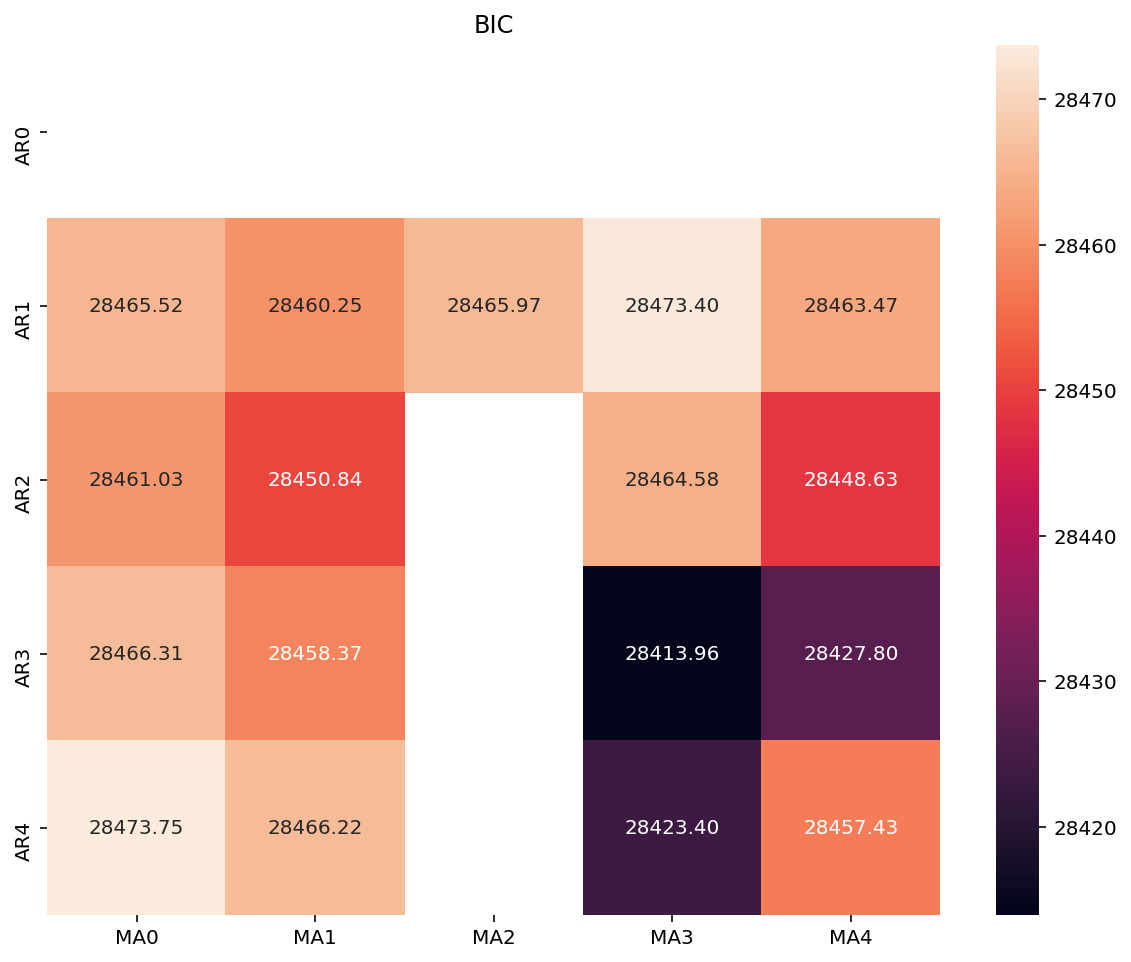

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(results_bic, 
                 mask = results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f')
ax.set_title('BIC')

In [19]:
train_results = sm.tsa.arma_order_select_ic(btc['price(USD)'], ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)

print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

AIC (4, 3)
BIC (4, 3)


The optimum parameter is SARIMAX(4,0,3)

### Model Diagnostic Checking

In [20]:
model_results

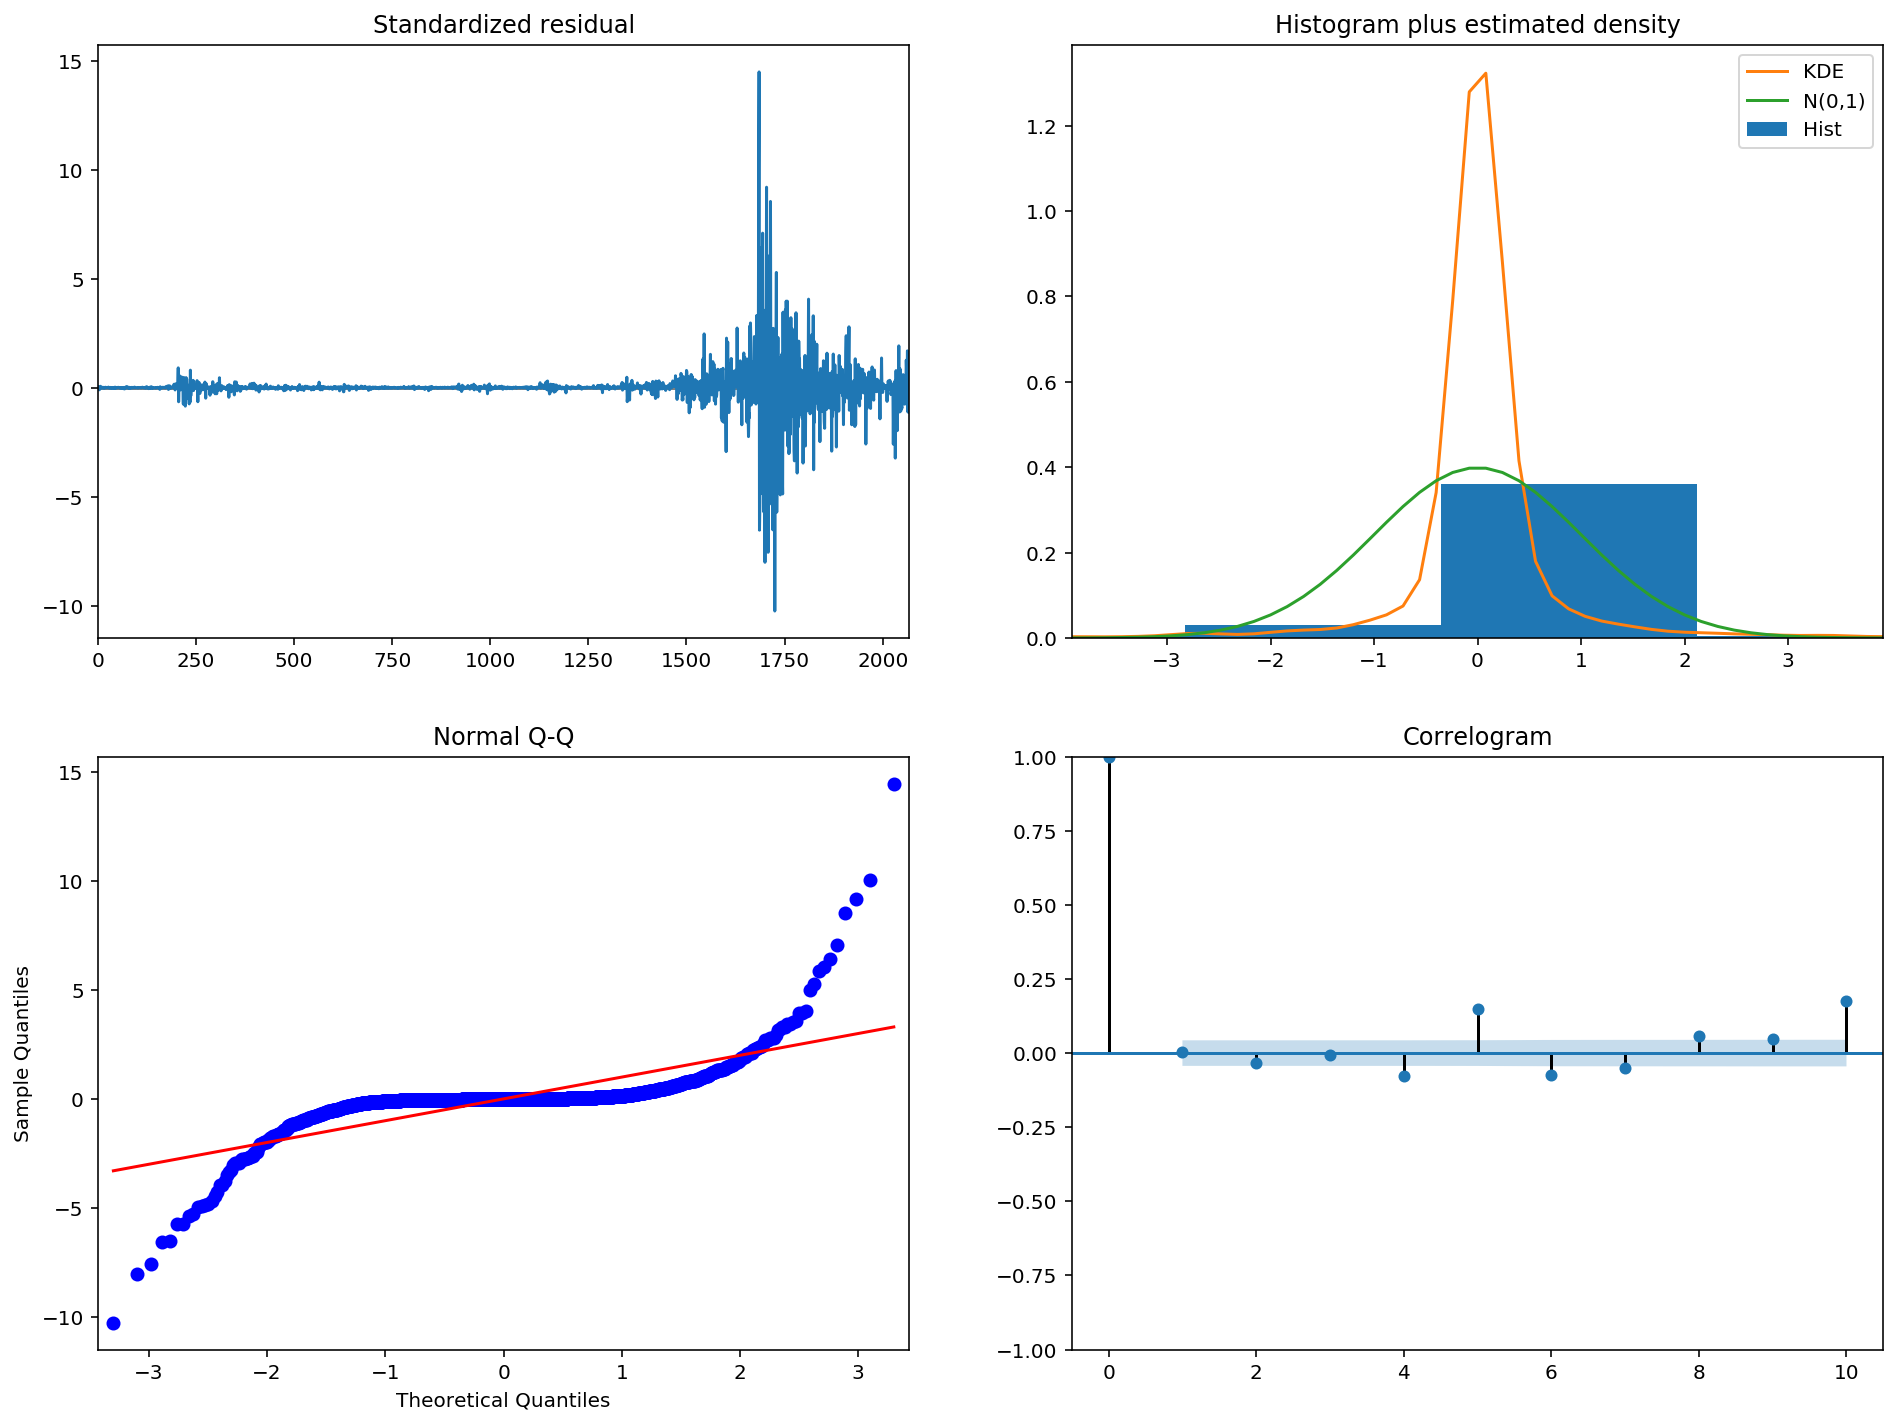

In [21]:
model_results.plot_diagnostics(figsize=(16, 12));

### Formal testing

In [22]:
het_method='breakvar'
norm_method='jarquebera'
sercor_method='ljungbox'

(het_stat, het_p) = model_results.test_heteroskedasticity(het_method)[0]
norm_stat, norm_p, skew, kurtosis = model_results.test_normality(norm_method)[0]
sercor_stat, sercor_p = model_results.test_serial_correlation(method=sercor_method)[0]
sercor_stat = sercor_stat[-1] # last number for the largest lag
sercor_p = sercor_p[-1] # last number for the largest lag

# Run Durbin-Watson test on the standardized residuals.
# The statistic is approximately equal to 2*(1-r), where r is the sample autocorrelation of the residuals.
# Thus, for r == 0, indicating no serial correlation, the test statistic equals 2.
# This statistic will always be between 0 and 4. The closer to 0 the statistic,
# the more evidence for positive serial correlation. The closer to 4,
# the more evidence for negative serial correlation.
# Essentially, below 1 or above 3 is bad.
dw = sm.stats.stattools.durbin_watson(model_results.filter_results.standardized_forecasts_error[0, model_results.loglikelihood_burn:])

# check whether roots are outside the unit circle (we want them to be);
# will be True when AR is not used (i.e., AR order = 0)
arroots_outside_unit_circle = np.all(np.abs(model_results.arroots) > 1)
# will be True when MA is not used (i.e., MA order = 0)
maroots_outside_unit_circle = np.all(np.abs(model_results.maroots) > 1)

print('Test heteroskedasticity of residuals ({}): stat={:.3f}, p={:.3f}'.format(het_method, het_stat, het_p));
print('\nTest normality of residuals ({}): stat={:.3f}, p={:.3f}'.format(norm_method, norm_stat, norm_p));
print('\nTest serial correlation of residuals ({}): stat={:.3f}, p={:.3f}'.format(sercor_method, sercor_stat, sercor_p));
print('\nDurbin-Watson test on residuals: d={:.2f}\n\t(NB: 2 means no serial correlation, 0=pos, 4=neg)'.format(dw))
print('\nTest for all AR roots outside unit circle (>1): {}'.format(arroots_outside_unit_circle))
print('\nTest for all MA roots outside unit circle (>1): {}'.format(maroots_outside_unit_circle))


Test heteroskedasticity of residuals (breakvar): stat=185.288, p=0.000

Test normality of residuals (jarquebera): stat=213588.511, p=0.000

Test serial correlation of residuals (ljungbox): stat=426.517, p=0.000

Durbin-Watson test on residuals: d=1.99
	(NB: 2 means no serial correlation, 0=pos, 4=neg)

Test for all AR roots outside unit circle (>1): True

Test for all MA roots outside unit circle (>1): True


### Model Performance Evaluation (in-sample fit) 

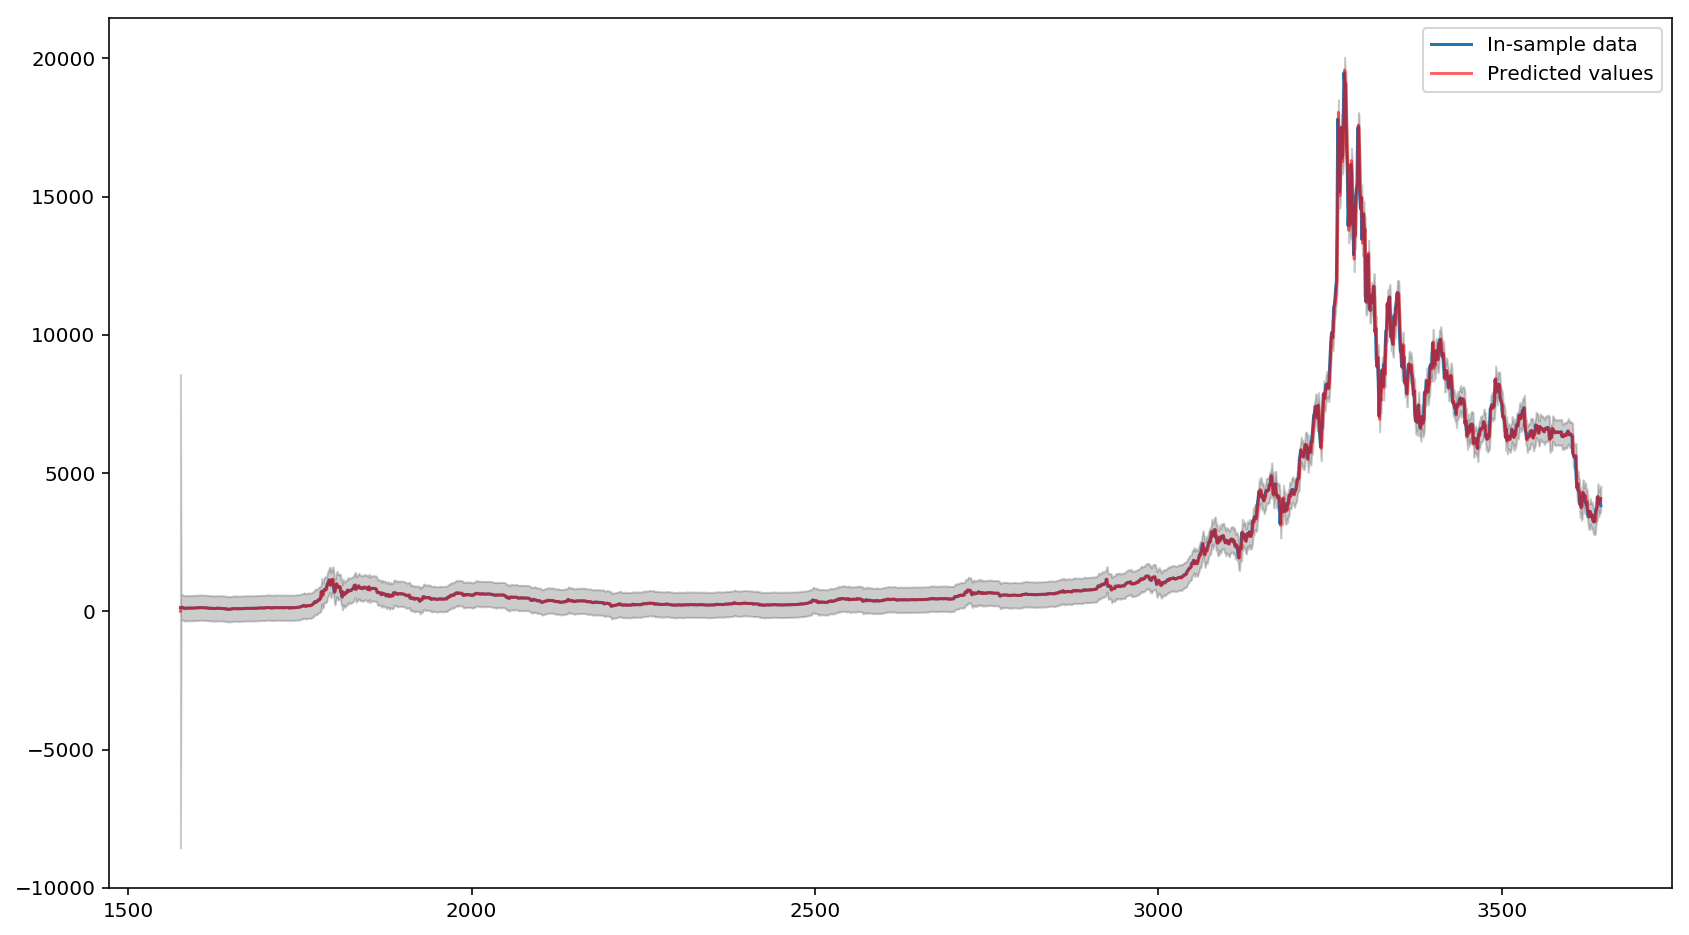

In [23]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
    
ax1.plot(btc['price(USD)'], label='In-sample data', linestyle='-')
# # subtract 1 only to connect it to previous point in the graph
# ax1.plot(btc_test, label='Held-out data', linestyle='--')

# yes DatetimeIndex
pred_begin = btc['price(USD)'].index[model_results.loglikelihood_burn]
pred_end = btc['price(USD)'].index[-1]
pred = model_results.get_prediction()
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int(alpha=0.05)

ax1.plot(pred_mean, 'r', alpha=.6, label='Predicted values')
ax1.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax1.legend(loc='best');

### Predict vs Actual

In [24]:
pred = model_results.get_prediction(start=1, end=2069)
pred.predicted_mean

1       135.10579
2       134.16615
3       144.51165
4       138.40115
5       114.46287
6       105.30778
7        97.32244
8       113.86216
9       116.03728
10      111.79003
11      109.22707
12      113.30152
13      112.59493
14      117.89440
15      115.30305
16      114.57955
17      118.04034
18      110.72246
19      114.26004
20      118.33373
21      123.71539
22      122.99729
23      122.25613
24      121.79453
25      122.76687
26      123.67854
27      126.29679
28      133.41652
29      131.70074
30      133.40963
31      129.28295
32      128.74147
33      132.29519
34      128.33595
35      128.62242
36      129.13701
37      121.78841
38      120.41821
39      121.26305
40      121.74999
41      118.56109
42      110.21633
43      107.48439
44       99.71258
45      106.63952
46      109.03505
47      108.59497
48      103.41838
49       99.54207
50       99.63038
          ...    
2020   6461.19920
2021   6516.31843
2022   6426.52320
2023   6371.92227
2024   640

In [25]:
btc['price(USD)']

1576    135.30000
1577    134.44000
1578    144.00000
1579    139.00000
1580    116.38000
1581    106.25000
1582     98.10000
1583    112.90000
1584    115.98000
1585    112.25000
1586    109.60000
1587    113.20000
1588    112.80000
1589    117.70000
1590    115.64000
1591    114.82000
1592    117.98000
1593    111.40000
1594    114.22000
1595    118.21000
1596    123.50000
1597    123.21000
1598    122.50000
1599    122.02000
1600    122.89000
1601    123.80000
1602    126.30000
1603    133.10000
1604    131.99000
1605    133.50000
1606    129.77000
1607    129.00000
1608    132.25000
1609    128.80000
1610    128.82000
1611    129.30000
1612    122.50000
1613    120.74000
1614    121.40000
1615    121.90000
1616    118.97000
1617    111.00000
1618    107.89000
1619    100.44000
1620    106.35000
1621    109.00000
1622    108.78000
1623    103.95000
1624    100.00000
1625     99.80000
          ...    
3595   6468.50000
3596   6522.27000
3597   6442.60000
3598   6386.13000
3599   641

### Evaluation using RMSE

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [27]:
rms = sqrt(mean_squared_error(btc['price(USD)'], pred.predicted_mean))
print(rms)

18.875191824472438


### Predict using SARIMAX(4,0,3)

In [28]:
btc.tail()

,date,marketcap(USD),price(USD)
3640,2018-12-22,67973007472.15462,3898.08000
3641,2018-12-23,70125066347.31425,4020.99000
3642,2018-12-24,69772389973.77393,4000.33000
3643,2018-12-25,71188017281.11649,4081.03000
3644,2018-12-26,66636342448.31270,3819.67000


In [29]:
pred2 = model_results.get_prediction(start=2065, end=2073)
pred2.predicted_mean

2065   3873.95897
2066   4024.21460
2067   3992.56015
2068   4080.92001
2069   3793.69330
2070   3785.83451
2071   3779.37935
2072   3773.04197
2073   3766.72343
dtype: float64

| Date | Bitcoin Actual Price (USD) | Bitcoin Prediction Price (USD) |
|--|----|----|
| 2018-12-22 	  | 3898.08000 | 3873.95897 |
| 2018-12-23 	  | 4020.99000 | 4024.21460 |
| 2018-12-24 	  | 4000.33000 | 3992.56015 |
| 2018-12-25 	  | 4081.03000 | 4080.92001 |
| 2018-12-26 	  | 3819.67000 | 3793.69330 |

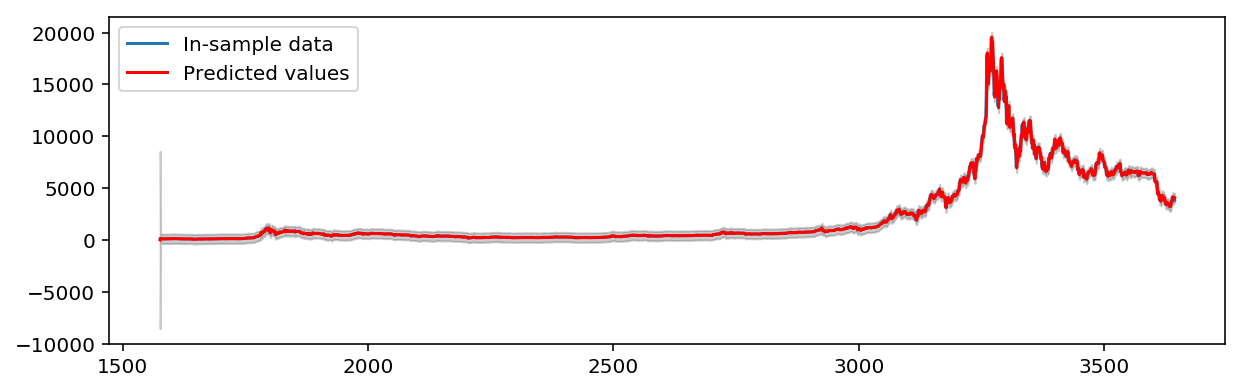

In [30]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
    
ax1.plot(btc['price(USD)'], label='In-sample data', linestyle='-')
# # subtract 1 only to connect it to previous point in the graph
# ax1.plot(btc_test, label='Held-out data', linestyle='--')

# yes DatetimeIndex
pred_begin = btc['price(USD)'].index[model_results.loglikelihood_burn]
pred_end = btc['price(USD)'].index[-1]
pred = model_results.get_prediction()
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int(alpha=0.05)

ax1.plot(pred_mean, 'r', label='Predicted values')
ax1.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax1.legend(loc='best');

Results and recomendation based on SARIMAX(4,0,3) model

| Date | Bitcoin Actual Price (USD) | Bitcoin Prediction Price (USD) | +/- |
|--|----|----|---|
| 2018-12-28  | - | 3779.37935 | - |
| 2018-12-29  | - | 3773.04197 | - |
| 2018-12-30  | - | 3766.72343 | - |

With error rate at (+/-) 18.87519,
1. At 2018-12-29, save buy 3754.16678-3773.04197, save sell 3773.04197-3791.91716
2. At 2018-12-29, save buy 3747.84824-3766.72343, save sell 3766.72343-3785.59862

Data resource https://coinmetrics.io/